In [5]:
import matplotlib.pyplot as plt
import random as rd
import numpy as np
from time import time
import os

In [41]:
outs_real = list(np.load('data/binary_mnist.npy').reshape((60000, 28, 28)))
outs_paper = [plt.imread('data/mnist_gen/'+e)[:,:,0] for e in os.listdir('data/mnist_gen') if '.png' in e]
rd.shuffle(outs_real)
rd.shuffle(outs_paper)

In [43]:
%matplotlib qt
fs = 2.56*2
fig = plt.figure(figsize=(fs,fs))
ax = fig.add_subplot(111)

def MTT(out1, out2):
    def update_image():
        global CURRENT_im,INDEX,SWITCH,PREFERENCES, CANVAS, READY
        READY = False
        ax.clear()
        ax.set_title(str(INDEX))
        SWITCH = rd.random()<0.5 
        
        if SWITCH:
            CURRENT_im = np.concatenate([out2[INDEX], out1[INDEX]], axis=1)
        else:
            CURRENT_im = np.concatenate([out1[INDEX], out2[INDEX]], axis=1)

        im1 = CURRENT_im.copy()
        im2 = CURRENT_im.copy()
        im1[:,im1.shape[1]//2:]=0
        im2[:,:im2.shape[1]//2]=0

        im = np.zeros_like(CURRENT_im)
        im[:,im.shape[1]//2]=1
        ax.imshow(im1, cmap='gray')
        fig.canvas.draw()
        plt.pause(1)

        ax.imshow(im2, cmap='gray')
        fig.canvas.draw()
        plt.pause(1)
        
        ax.imshow(im)
        fig.canvas.draw()
        READY = True


    def onclick(event):
        global CURRENT_im,INDEX,SWITCH,PREFERENCES, CANVAS, READY
        try:
            if READY:
                ix = event.xdata
                PREFERENCES.append((ix>=CURRENT_im.shape[1]/2)==SWITCH)
                INDEX += 1
                print(sum(PREFERENCES)*1/len(PREFERENCES))
                
                if INDEX<len(out1):
                    update_image()
                else:
                    plt.close()
                    print(PREFERENCES)
        except:
            print('oops')


    global CURRENT_im,INDEX,SWITCH,PREFERENCES, CANVAS,READY
    READY=True
    CURRENT_im = None
    INDEX = 0
    SWITCH = False
    PREFERENCES = []
    update_image()

    _ = fig.canvas.mpl_connect('button_press_event', onclick)
    plt.show()


start = 0
MTT(outs_paper[start:], outs_real[start:])

0.0
0.0
0.0
0.0
0.2
0.16666666666666666
0.14285714285714285
0.125
0.1111111111111111
0.1
0.09090909090909091
0.08333333333333333
0.15384615384615385
0.21428571428571427
0.26666666666666666
0.3125
0.35294117647058826
0.3888888888888889
0.42105263157894735
0.4
0.38095238095238093
0.4090909090909091
0.43478260869565216
0.4166666666666667
0.44
0.46153846153846156
0.4444444444444444
0.42857142857142855
0.41379310344827586
0.4
0.41935483870967744
0.40625
0.3939393939393939
0.38235294117647056
0.4
0.4166666666666667
0.40540540540540543


In [44]:
print(sum(PREFERENCES)*1/len(PREFERENCES), "towards first list") 

0.40540540540540543 towards first list


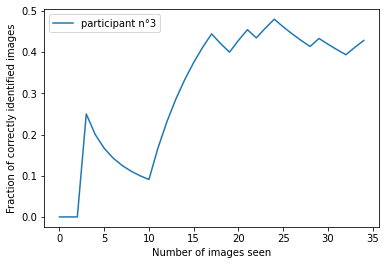

In [45]:
%matplotlib inline

def sliding_mean(arr, p=4):
    L =[sum(arr[:p])/p]
    
    for i in range(len(arr)-p):
        L.append( (L[-1]*p+arr[p+i]-arr[i])/p)
    return L
    
sc = [sum(PREFERENCES[1:i])*1/len(PREFERENCES[1:i]) for i in range(2,len(PREFERENCES))]
plt.plot(sc, label='participant n°3')
plt.xlabel('Number of images seen')
plt.ylabel('Fraction of correctly identified images')
plt.legend()
plt.show()
# plt.plot(sliding_mean(sc,3))
#plt.savefig('export/pfool.png')